# <center><u>Data Cleaning</u></center>

 Data cleaning is a part of the process on a data science project.
 
Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.
<br>
When you clean your data, all outdated or incorrect information is gone – leaving you with the highest quality information for your analysis and model building.

<p style='text-align: right;'> 4 points</p>


In [1]:
# import pandas and numpy with alias pd and np respectively
import pandas as pd
import numpy as np

Create a dataframe, d1 = pd.DataFrame( {‘Temperature’ : [1, np.nan, 3, 2, 3] ,’Humidity’ : [22, np.nan, 2 , np.nan, 20 ] })

In [2]:
#create d1
d1 = pd.DataFrame({'Temperature' : [1, np.nan, 3, 2, 3] ,'Humidity' : [22, np.nan, 2 , np.nan, 20 ] })

print the dataframe d1

In [3]:
#print d1
d1

,Temperature,Humidity
0,1.0,22.0
1,NaN,NaN
2,3.0,2.0
3,2.0,NaN
4,3.0,20.0


Find whether the given dataframe contain any missing values? 

In [4]:
#check for null
d1.isnull()

,Temperature,Humidity
0,False,False
1,True,True
2,False,False
3,False,True
4,False,False


How many missing values does each column have?

In [5]:
#total null
d1.isnull().sum()

Temperature    1
Humidity       2
dtype: int64

## Dealing with missing values

Refrence:-https://www.youtube.com/watch?v=xkRz6R0FlQ4

<br>Now, we know we have missing values, the next thing that we need to work on, is how to deal with these missing values

 - ## Method 1: Delete the rows which contain missing values.
 This method include dropping all the rows that have missing value in any column. 

 <p style='text-align: right;'> 20 points</p>

Use a suitable method to drop all the rows having missing values and save the change in d2 variable

In [6]:
d2= d1.dropna() #drop nan

Print d2

In [7]:
#print nan
d2

,Temperature,Humidity
0,1.0,22.0
2,3.0,2.0
4,3.0,20.0


Hey Remember : droping rows with nan is one of the method to deal with missing values. But you have to decide if you need to go for this method by checking percentage of nan present in the dataframe.

If a column is having more than 60% of nan values then its better to remove such variables altogether if business permits 

- ## Method 2: Replacing missing values
Sometimes rather than dropping NA values, you'd rather replace them with a valid value. This value might be a single number like zero, or it might be some sort of imputation or interpolation

<p style='text-align: right;'> 30 points</p>


Impute the missing values with constant number of your choice

In [8]:
# The below output has imputed missing  values with 100
d1.fillna(100.0)



,Temperature,Humidity
0,1.0,22.0
1,100.0,100.0
2,3.0,2.0
3,2.0,100.0
4,3.0,20.0


Do you think its a  good way to treat Nan values? What if such constant values are not suitable for our further analysis?
Try to give your thoughts on this.

In [9]:
#No it is not a good way to proceed, we either replace them with statistical measures or impute through other methods like building separate model for the same

Impute the missing values with mean

In [10]:
d1.fillna(d1.mean())

,Temperature,Humidity
0,1.00,22.000000
1,2.25,14.666667
2,3.00,2.000000
3,2.00,14.666667
4,3.00,20.000000


Impute the missing values with median

In [11]:
d1.fillna(d1.median())

,Temperature,Humidity
0,1.0,22.0
1,2.5,20.0
2,3.0,2.0
3,2.0,20.0
4,3.0,20.0


Replacing with the mean, mode or median approximations are a statistical approach of handling the missing values.

Another Fun fact:
    
    This is an approximation which can add variance to the data set. But the loss of the data can be negated by this method which yields better results compared to removal of rows and columns.

Impute Nan with forward fill

In [12]:
#forward fill
d1.fillna(method='ffill')

,Temperature,Humidity
0,1.0,22.0
1,1.0,22.0
2,3.0,2.0
3,2.0,2.0
4,3.0,20.0


Impute Nan with backward fill

In [13]:
#backward fill
d1.fillna(method='bfill')

,Temperature,Humidity
0,1.0,22.0
1,3.0,2.0
2,3.0,2.0
3,2.0,20.0
4,3.0,20.0


Hey a fun fact here, as sweet as a cookie:

- ffill/pad/bfill are good imputation method if our data is of time series. This would keep the trend unaffected for our analysis.

Impute nan using interpolation method

In [14]:
#interpolate
d1.interpolate()

,Temperature,Humidity
0,1.0,22.0
1,2.0,12.0
2,3.0,2.0
3,2.0,11.0
4,3.0,20.0


You lucky champ! you got to know another amazing fact:
 - Interpolation method by default is linear in nature. It is an imputation technique that assumes a linear relationship between data points and utilises non-missing values from adjacent data points to compute a value for a missing data point.


You can explore other techniques involved in interplolation method, which might be usefull for your project.

Perform KNN imputation

Reference: https://link.medium.com/mV3023if8gb

In [15]:
# Hint: Import KNNImputer and impute it on d1. Also note: Use n_neighbors=2
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
d1 = pd.DataFrame(imputer.fit_transform(d1),columns = d1.columns)
d1

,Temperature,Humidity
0,1.00,22.000000
1,2.25,14.666667
2,3.00,2.000000
3,2.00,12.000000
4,3.00,20.000000


Point to ponder: KNN is an algorithm that is useful for matching a point with its closest k neighbors in a multi-dimensional space.

Do you think scaling is required to implement this method?. Yes you are right the answer is YES.
Can you comment below why normalized data is required, so that we understand your logic on this.

It requires us to normalize our data. Otherwise, the different scales of our data will lead the KNN Imputer to generate biased replacements for the missing values.

# Dropping Irrelevant Columns

Reference:-https://www.youtube.com/watch?v=cRurWEfmxC0

<p style='text-align: right;'> 5 points</p>


Create a dataframe df = pd.DataFrame(np.random.randint(0,100,size=(100, 5)), columns=list('ABCDE'))


In [16]:
np.random.seed(10)

df = pd.DataFrame(np.random.randint(0,100,size=(100, 5)), columns=list('ABCDE')) #define df


print df

In [17]:
print(df)

     A   B   C   D   E
0    9  15  64  28  89
1   93  29   8  73   0
2   40  36  16  11  54
3   88  62  33  72  78
4   49  51  54  77  69
..  ..  ..  ..  ..  ..
95   3  50  59  34  21
96  16  18  61  54  60
97  21  87  83  71  16
98  67  38  27  96  87
99  98  89  16  82  19

[100 rows x 5 columns]


Note: Since all the rows are having random numbers, your dataframe observations might be different than the output given above

Suppose for our analysis our project do not require column E. So you need to remove this column. update this new change using inplace parameter

In [18]:
#drop E
df.drop(['E'],axis=1,inplace=True)

Check if column **E** is removed by printing head of df

In [19]:
#df head
df.head()

,A,B,C,D
0,9,15,64,28
1,93,29,8,73
2,40,36,16,11
3,88,62,33,72
4,49,51,54,77


# Ensure requirements as per domain

Reference:-https://www.youtube.com/watch?v=eM7p3MVLOZ8

<p style='text-align: right;'> 10 points</p>



Shallow copy the dataframe df in variable df2 and print df2 head






In [20]:
df2= df.copy(deep=False)#

#df2 head
df2.head()

,A,B,C,D
0,9,15,64,28
1,93,29,8,73
2,40,36,16,11
3,88,62,33,72
4,49,51,54,77


Suppose your domain expert says to filter column B with even numbers to do correct analysis. Implement the same below and update the change in varaible df2.

In [21]:
df2 = df2.iloc[np.where(df2['B']%2==0)] #

print updated head of *df2*

In [22]:
# df2 head
df2.head()

,A,B,C,D
2,40,36,16,11
3,88,62,33,72
6,30,30,89,12
9,11,28,74,88
10,15,18,80,71


# Creating a sensible index values

Reference:-https://www.youtube.com/watch?v=FQ4IB5mZOmQ


Oops. The index in this dataframe doesn't make sense. please correct index in a sequential manner starting from 1. Save the updates in df2

In [23]:
#set proper index
df2=df2.reset_index(drop=True)

print df2 head again

In [24]:
# df2 head
df2.head()

,A,B,C,D
0,40,36,16,11
1,88,62,33,72
2,30,30,89,12
3,11,28,74,88
4,15,18,80,71


# Renaming column names to meaningful names.

Reference:- https://www.youtube.com/watch?v=YnggjqAfZCU
<p style='text-align: right;'> 2 points</p>


Now df2 columns represents marks of the adventurous 'Anand', the brave 'Barkha', the compassionate 'Chandu' and the dashing 'Daniel'. Rename the columns with their name inplace of their first letter of their name.

In [25]:
#column renaming
df2.columns=['Anand','Barkha','Chandu','Daniel']

print df2 tail with updated column names

In [26]:
# df2 head
df2.tail()

,Anand,Barkha,Chandu,Daniel
43,1,82,34,11
44,74,36,6,63
45,3,50,59,34
46,16,18,61,54
47,67,38,27,96


Yeah! now the data looks pretty meaningful to study

# Treating Duplicate Data

Reference: https://www.youtube.com/watch?v=bFVMR1qfzXo

<p style='text-align: right;'> 20 points</p>


Make another dataframe df3 by deep copying df2.

In [27]:
df3=df2.copy(deep=True) #

Make another column in df3 with name 'dummy' having 0 as values
throughout the rows.

In [28]:
#assign dummy column full of zero value
df3['dummy']=0

In [29]:
# print head of df, df2 and df3
print(df.head())
print(df2.head())
print(df3.head())

    A   B   C   D
0   9  15  64  28
1  93  29   8  73
2  40  36  16  11
3  88  62  33  72
4  49  51  54  77
   Anand  Barkha  Chandu  Daniel
0     40      36      16      11
1     88      62      33      72
2     30      30      89      12
3     11      28      74      88
4     15      18      80      71
   Anand  Barkha  Chandu  Daniel  dummy
0     40      36      16      11      0
1     88      62      33      72      0
2     30      30      89      12      0
3     11      28      74      88      0
4     15      18      80      71      0


Hey buddy! Don't you think, there is some difference between copy operation used for creating df2 and df3.

If you think Yes, Then please comment below the difference

In [30]:
# comment
# For creating df2 we used value of deep as False, thus making shallow copy and while creatin df3 we used deep as True, which made deep copy
#Deep Copy    -----> does not change the original data---> uses different memory for storing values
#Shallow copy -----> changes the original data too ----> dont use different memory

print tail of df3

In [31]:
# df3 tail
df3.tail()

,Anand,Barkha,Chandu,Daniel,dummy
43,1,82,34,11,0
44,74,36,6,63,0
45,3,50,59,34,0
46,16,18,61,54,0
47,67,38,27,96,0


make an array name 'ListB' with values of column 'Barkha'

In [32]:
ListB= np.array(df3['Barkha'])

Print ListB

In [33]:
#print ListB
ListB

array([36, 62, 30, 28, 18, 50, 88, 50, 80, 66, 96, 30,  4, 30,  2, 42, 94,
       18, 44, 68, 58, 48, 70, 22, 36, 32, 32, 96, 30, 86,  0, 76, 88, 64,
       52, 46, 20, 66, 56,  8, 68, 50, 28, 82, 36, 50, 18, 38])

Assign this array values as another column in df3 with name 'Anonymous'

In [34]:
#create Anonymous column
df3['Anonymous']=ListB

Create a dataframe 'ListA' with values of row index 3, 10 and 40

In [35]:
ListA = df3.iloc[[3,10,40]] #

print ListA

In [36]:
# print ListA
ListA

,Anand,Barkha,Chandu,Daniel,dummy,Anonymous
3,11,28,74,88,0,28
10,88,96,73,40,0,96
40,87,68,86,14,0,68


Concat ListA to df3 ignoring the index values of ListA so that we can maintain the sequential index value thoughout the dataframe.

In [37]:
df3= pd.concat([df3,ListA],ignore_index=True)

print head of df3

In [38]:
# df3 head
df3.head()

,Anand,Barkha,Chandu,Daniel,dummy,Anonymous
0,40,36,16,11,0,36
1,88,62,33,72,0,62
2,30,30,89,12,0,30
3,11,28,74,88,0,28
4,15,18,80,71,0,18


Check if there is any duplicate rows present in the dataframe df3

In [39]:
#check duplicate
df3[df3.duplicated()]

,Anand,Barkha,Chandu,Daniel,dummy,Anonymous
48,11,28,74,88,0,28
49,88,96,73,40,0,96
50,87,68,86,14,0,68


By above output it seems we do have duplicated rows in our dataset

Drop duplicated rows using pandas function keeping first values of such duplicated observations

In [40]:
#drop duplicate
df3.drop_duplicates(keep='first',inplace=True)

Check again if we have any duplicate row values present 

In [41]:
#check duplicate
df3[df3.duplicated()]

,Anand,Barkha,Chandu,Daniel,dummy,Anonymous


In [42]:
df3.head()

,Anand,Barkha,Chandu,Daniel,dummy,Anonymous
0,40,36,16,11,0,36
1,88,62,33,72,0,62
2,30,30,89,12,0,30
3,11,28,74,88,0,28
4,15,18,80,71,0,18


In [43]:
df3.columns.duplicated()

array([False, False, False, False, False, False])

Yipeee!! Did you notice the dataframe is free from any duplicate rows now.

Drop any duplicate columns present in the dataframe df

In [44]:
df3= df3.T.drop_duplicates().T #

#print df3
df3

,Anand,Barkha,Chandu,Daniel,dummy
0,40,36,16,11,0
1,88,62,33,72,0
2,30,30,89,12,0
3,11,28,74,88,0
4,15,18,80,71,0
5,88,50,54,34,0
6,77,88,15,6,0
7,97,50,45,40,0
8,81,80,41,90,0
9,96,66,67,62,0


Did you notice which Column is dropped?
I am sure you noticed it.
Name that column below

In [45]:
#Column: Anonymous

# Treating constant column values

<p style='text-align: right;'> 2 points</p>


Check unique values in each columns

In [46]:
# df3 unique value
df3.nunique()

Anand     42
Barkha    32
Chandu    40
Daniel    36
dummy      1
dtype: int64

By above output which column has only 1 value as unique throught the rows? 
Yeah! you are right, its dummy column.
So lets drop it

Drop dummy column as it has constant values which will not give us any information and save the changes to df3 using inplace parameter

In [47]:
# drop dummy
df3.drop(['dummy'],axis=1,inplace=True)

print final obtained dataframe df3

In [48]:
# print df3
df3

,Anand,Barkha,Chandu,Daniel
0,40,36,16,11
1,88,62,33,72
2,30,30,89,12
3,11,28,74,88
4,15,18,80,71
5,88,50,54,34
6,77,88,15,6
7,97,50,45,40
8,81,80,41,90
9,96,66,67,62


# Iterating dataframes
<p style='text-align: right;'> 25 points </p>


Reference: https://www.youtube.com/watch?v=0nI3HTLPpZI
Let's look at three main ways to iterate over DataFrames.

1. iteritems()
2. iterrows()
3. itertuples()

We will also see time taken by these methods to print our dataframe. 

**1. Iterating DataFrames with iteritems()**

Lets iterate over rows of df3 uisng iteritems.



In [49]:
import time
start = time.time()

#Use iteritems to iterate
for i in df3.iteritems():
    print(i)
    
print('Time taken(sec): ',(time.time()-start)*1000)

('Anand', 0     40
1     88
2     30
3     11
4     15
5     88
6     77
7     97
8     81
9     96
10    88
11    28
12    33
13    68
14     9
15    62
16    32
17    45
18     6
19    44
20    39
21    69
22     5
23     4
24    10
25    85
26    31
27     0
28     2
29    63
30    19
31    58
32     7
33    27
34    27
35    99
36    84
37    77
38    82
39    74
40    87
41    50
42     1
43     1
44    74
45     3
46    16
47    67
Name: Anand, dtype: int64)
('Barkha', 0     36
1     62
2     30
3     28
4     18
5     50
6     88
7     50
8     80
9     66
10    96
11    30
12     4
13    30
14     2
15    42
16    94
17    18
18    44
19    68
20    58
21    48
22    70
23    22
24    36
25    32
26    32
27    96
28    30
29    86
30     0
31    76
32    88
33    64
34    52
35    46
36    20
37    66
38    56
39     8
40    68
41    50
42    28
43    82
44    36
45    50
46    18
47    38
Name: Barkha, dtype: int64)
('Chandu', 0     16
1     33
2     89
3     74
4     80
5   

Did you notice buddy how iteritems are iterating over df3.

Along with ways each iterating function works, also keep tallying the time taken for all other lopps too!. This will be fun, lets check iterrows()

**2. Iterating DataFrames with iterrows()**

In [50]:
import time
start = time.time()
#Use iterrows to iterate
for i in df3.iterrows():
    print(i)

print('Time taken(sec): ',(time.time()-start)*1000)

(0, Anand     40
Barkha    36
Chandu    16
Daniel    11
Name: 0, dtype: int64)
(1, Anand     88
Barkha    62
Chandu    33
Daniel    72
Name: 1, dtype: int64)
(2, Anand     30
Barkha    30
Chandu    89
Daniel    12
Name: 2, dtype: int64)
(3, Anand     11
Barkha    28
Chandu    74
Daniel    88
Name: 3, dtype: int64)
(4, Anand     15
Barkha    18
Chandu    80
Daniel    71
Name: 4, dtype: int64)
(5, Anand     88
Barkha    50
Chandu    54
Daniel    34
Name: 5, dtype: int64)
(6, Anand     77
Barkha    88
Chandu    15
Daniel     6
Name: 6, dtype: int64)
(7, Anand     97
Barkha    50
Chandu    45
Daniel    40
Name: 7, dtype: int64)
(8, Anand     81
Barkha    80
Chandu    41
Daniel    90
Name: 8, dtype: int64)
(9, Anand     96
Barkha    66
Chandu    67
Daniel    62
Name: 9, dtype: int64)
(10, Anand     88
Barkha    96
Chandu    73
Daniel    40
Name: 10, dtype: int64)
(11, Anand     28
Barkha    30
Chandu    89
Daniel    25
Name: 11, dtype: int64)
(12, Anand     33
Barkha     4
Chandu    87
Dani

**3. Iterating DataFrames with itertuples()**

In [51]:
#iterate df3 using itertuples
import time
start = time.time()

#Use itertuples to iterate
for i in df3.itertuples():
    print(i)

print('Time taken(sec): ',(time.time()-start)*1000)

Pandas(Index=0, Anand=40, Barkha=36, Chandu=16, Daniel=11)
Pandas(Index=1, Anand=88, Barkha=62, Chandu=33, Daniel=72)
Pandas(Index=2, Anand=30, Barkha=30, Chandu=89, Daniel=12)
Pandas(Index=3, Anand=11, Barkha=28, Chandu=74, Daniel=88)
Pandas(Index=4, Anand=15, Barkha=18, Chandu=80, Daniel=71)
Pandas(Index=5, Anand=88, Barkha=50, Chandu=54, Daniel=34)
Pandas(Index=6, Anand=77, Barkha=88, Chandu=15, Daniel=6)
Pandas(Index=7, Anand=97, Barkha=50, Chandu=45, Daniel=40)
Pandas(Index=8, Anand=81, Barkha=80, Chandu=41, Daniel=90)
Pandas(Index=9, Anand=96, Barkha=66, Chandu=67, Daniel=62)
Pandas(Index=10, Anand=88, Barkha=96, Chandu=73, Daniel=40)
Pandas(Index=11, Anand=28, Barkha=30, Chandu=89, Daniel=25)
Pandas(Index=12, Anand=33, Barkha=4, Chandu=87, Daniel=94)
Pandas(Index=13, Anand=68, Barkha=30, Chandu=70, Daniel=74)
Pandas(Index=14, Anand=9, Barkha=2, Chandu=65, Daniel=13)
Pandas(Index=15, Anand=62, Barkha=42, Chandu=34, Daniel=40)
Pandas(Index=16, Anand=32, Barkha=94, Chandu=86, Danie

Hey buddy! so as you have seen every method works differently 
    
    iteritems(): Helps to iterate over each element of the set, column-wise. 
    iterrows(): Each element of the set, row-wise. 
    itertuple(): Each row and form a tuple out of them.

But if you ask for speed. The most best perfromance is given by itertuples compared to other two iterating methods.
So if anytime you need to save your computation time on iteration of dataframes you can go for itertuples. Was'nt it fun?:)

# Regular Expression 
<p style='text-align: right;'> 15 points </p>


Reference: https://www.youtube.com/watch?v=zTTQ8FE60j8

Reference: https://www.youtube.com/watch?v=h6E1PiTXnVI

Reference doc: https://www.guru99.com/python-regular-expressions-complete-tutorial.html

Python has a module named re to work with RegEx


### **!Are you ready to try regex on dataframes?**

*So here we go.!*

We are gonna try out following awesome re module functions

1. findall 
2. search
3. sub
4. split

If you want you can also refer the below regular expression syntax.

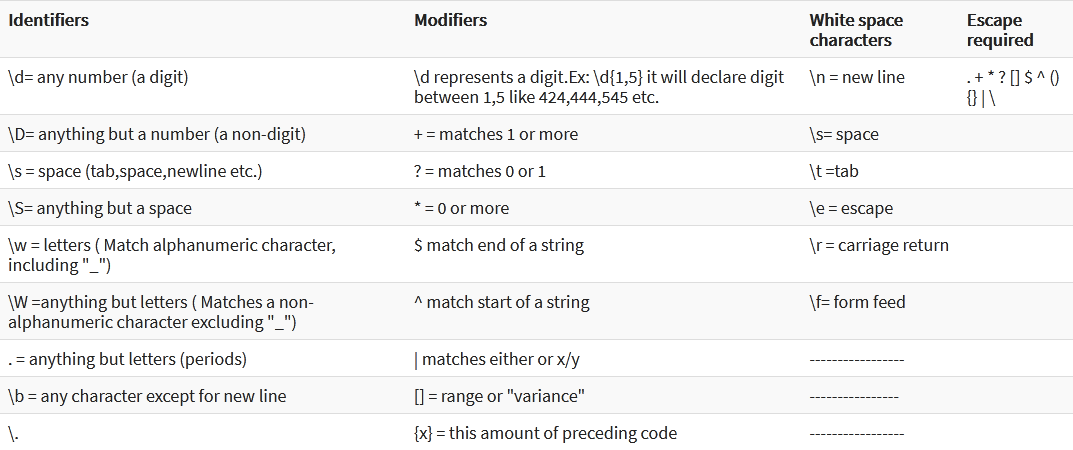


Hey future data scientists! we will now use regex on dataframes for data cleaning.

Who doesn't know Trump?. Lets dowload this interesting dataset of Trump insult tweets :https://www.kaggle.com/ayushggarg/all-trumps-twitter-insults-20152021/download

On this dataset we will learn how to use regex for data cleaning. By the way it will be also very usefull for feature engineering too!.



In [52]:
#load dataset
tweet_data= pd.read_csv('trump_insult_tweets_2014_to_2021.csv') #

In [53]:
#import re module
import re

#print head of tweet_data
tweet_data.head()

,Unnamed: 0,date,target,insult,tweet
0,1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
1,2,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ..."
2,3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...
3,4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...
4,5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily..."


Lets do some analysis using regex on this dataset

Before we go ahead, do you remember apply function? because you will have to require apply function to impliment regex methods.

You can refer this video so that you revisit how apply function works: https://www.youtube.com/watch?v=7HN-4Df8ZpA

**1. findall()**

Make another column 'year' with year in each row using regex on date column.


In [54]:
# create a function which takes date as parameter and applies regex on it
def year_func(date):
    year_list=re.findall(r'^\w+',date)
    year=year_list[0]
    return year

#use apply function on tweet_data to use above function in order to make year column
tweet_data['year'] = tweet_data['date'].apply(year_func)

#print tweet_data head
tweet_data.head()

,Unnamed: 0,date,target,insult,tweet,year
0,1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ...",2014
1,2,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ...",2014
2,3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...,2015
3,4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...,2015
4,5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily...",2015


lets filter year from 2020-2021 which was the election time in USA.

**2. search**

We will use regex search for this 

In [55]:
# create a function which takes year as parameter and applies regex on it
def search_funct(year):
    patterns=['2021','2020']
    for pattern in patterns:
        y=re.search(pattern,year)
    return y
    
#use apply function on tweet_data to use above function in order to search tweets of 2020-2021
tweet_data['year']=tweet_data['year'].apply(search_funct)

#tweet_data head
tweet_data.head()

,Unnamed: 0,date,target,insult,tweet,year
0,1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ...",None
1,2,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ...",None
2,3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...,None
3,4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...,None
4,5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily...",None


You can also do the same thing using regex match function to do this which is vailable in pandas

Reference: https://www.geeksforgeeks.org/python-pandas-series-str-match/

In [56]:
#Before that we need to change the 'year' column again as it has changed into None 
tweet_data['year'] = tweet_data['date'].apply(year_func)

In [57]:
# apply pandas str.match() function
tweet_data=tweet_data.iloc[np.where(tweet_data['date'].str.match(pat='(2020|2021)'))]

tweet_data

,Unnamed: 0,date,target,insult,tweet,year
7621,7622,2020-01-01,impeachment-inquiry,The greatest Witch Hunt in U.S. history,Thank you Steve. The greatest Witch Hunt in U....,2020
7622,7623,2020-01-02,impeachment-inquiry,"Witch Hunt is sputtering badly, but still goin...",A lot of very good people were taken down by a...,2020
7623,7624,2020-01-04,impeachment-inquiry,this ridiculous Impeachment Lite Hoax,"As hard as I work, & as successful as our Coun...",2020
7624,7625,2020-01-06,los-angeles,poorly run,"....If however, the city or state in question ...",2020
7625,7626,2020-01-06,impeachment-inquiry,The great Scam continues,“The reason they are not sending the Articles ...,2020
...,...,...,...,...,...,...
10355,10356,2021-01-06,2020-election,Many States want to decertify the mistake they...,If Vice President @Mike_Pence comes through fo...,2021
10356,10357,2021-01-06,2020-election,"based on irregularities and fraud, plus corrup...","States want to correct their votes, which they...",2021
10357,10358,2021-01-06,2020-election,Our Election Process is worse than that of thi...,"They just happened to find 50,000 ballots late...",2021
10358,10359,2021-01-06,2020-election,a FRAUD,The States want to redo their votes. They foun...,2021


cool right!

You got some null values after applying above function. Lets drop them using dropna function. Also drop 'Unnamed: 0' column as it does not give any information.


In [58]:
#drop na and Unnamed: 0 column
tweet_data.dropna(inplace=True)
tweet_data.drop(['Unnamed: 0'], axis=1, inplace=True)

**3. sub() Function**

Now you have filtered the dataset with 2739 rows. Let's remove all @ from tweet column suing re sub() function.

In [59]:
# create a function which takes tweet as parameter and applies regex on it
def tweet_func(x):
    match=re.sub(r'@\S+',' ',x)
    return match

#use apply function on tweet_data to use above function in order to remove @ from tweets
tweet_data['tweet']=tweet_data['tweet'].apply(tweet_func)
#tweet_data head
tweet_data.head()

,date,target,insult,tweet,year
7621,2020-01-01,impeachment-inquiry,The greatest Witch Hunt in U.S. history,Thank you Steve. The greatest Witch Hunt in U....,2020
7622,2020-01-02,impeachment-inquiry,"Witch Hunt is sputtering badly, but still goin...",A lot of very good people were taken down by a...,2020
7623,2020-01-04,impeachment-inquiry,this ridiculous Impeachment Lite Hoax,"As hard as I work, & as successful as our Coun...",2020
7624,2020-01-06,los-angeles,poorly run,"....If however, the city or state in question ...",2020
7625,2020-01-06,impeachment-inquiry,The great Scam continues,“The reason they are not sending the Articles ...,2020


You can also use the sub function just in one line using list comprehension. Can you try doing it below?

**4. split() Function**

Lets now split the column target by making another column Name which has name before hyphen("-")


In [60]:
# create a function which takes target as parameter and applies regex on it
def split_func(x):
    l=re.split('-',x)
    return l[0]

#use apply function on tweet_data to use above function in order to create Name column
tweet_data['Name']=tweet_data['target'].apply(split_func)
#tweet_data head
tweet_data.head()

,date,target,insult,tweet,year,Name
7621,2020-01-01,impeachment-inquiry,The greatest Witch Hunt in U.S. history,Thank you Steve. The greatest Witch Hunt in U....,2020,impeachment
7622,2020-01-02,impeachment-inquiry,"Witch Hunt is sputtering badly, but still goin...",A lot of very good people were taken down by a...,2020,impeachment
7623,2020-01-04,impeachment-inquiry,this ridiculous Impeachment Lite Hoax,"As hard as I work, & as successful as our Coun...",2020,impeachment
7624,2020-01-06,los-angeles,poorly run,"....If however, the city or state in question ...",2020,los
7625,2020-01-06,impeachment-inquiry,The great Scam continues,“The reason they are not sending the Articles ...,2020,impeachment


Now can you filter out Name which are specially targetted for trump? Lets do it below and check how many such tweets are there.

In [61]:
#filter Name which is euqals to trump
tweet_data=tweet_data.iloc[np.where(tweet_data['Name'].str.match(pat='(trump)'))]

tweet_data

,date,target,insult,tweet,year,Name
7859,2020-02-09,trump-russia,"THE WHOLE SCAM INVESTIGATION, THE MUELLER REPO...",FBI Director Christopher Wray just admitted th...,2020,trump
7860,2020-02-09,trump-russia,the biggest political crime in American Histor...,....This is the biggest political crime in Ame...,2020,trump
7861,2020-02-09,trump-russia,THE PARTY IN POWER ILLEGALLY SPIED ON MY CAMPAIGN,....This is the biggest political crime in Ame...,2020,trump
7890,2020-02-12,trump-russia,an investigation that was illegal,Who are the four prosecutors (Mueller people?)...,2020,trump
7891,2020-02-12,trump-russia,the Mueller Scam,Who are the four prosecutors (Mueller people?)...,2020,trump
...,...,...,...,...,...,...
9658,2020-10-07,trump-russia,Hoax Scandal,All Russia Hoax Scandal information was Declas...,2020,trump
9659,2020-10-07,trump-russia,the biggest political crime in the history of ...,All Russia Hoax Scandal information was Declas...,2020,trump
10091,2020-11-22,trump-russia,never ending Witch Hunt,Thanks Mark. It’s all a continuation of the ne...,2020,trump
10188,2020-12-09,trump-critics,obnoxious,Germany has consistently been used by my obnox...,2020,trump


So here you got total of 65 records which were  tweeted on Donald Trump in the span of 2020-2021. 

Well done buddy! You have learned how to apply regex on dataframes. Regex are mostly used for datasets which are having textual information.

Good job!  Now our interesting trump insult tweet data is somewhat cleaned. 

---------------------------------

# C'mon cheers:) you have completed the 5th milestone challenge too. 

--------------------------------

# FeedBack
We hope you’ve enjoyed this course so far. We’re committed to help you use "AI for All" course to its full potential, so that you have a great learning experience. And that’s why we need your help in form of a feedback here.

Please fill this feedback form https://docs.google.com/forms/d/e/1FAIpQLSfjBmH0yJSSA34IhSVx4h2eDMgOAeG4Dk-yHid__NMTk3Hq5g/viewform